***
***
<div>
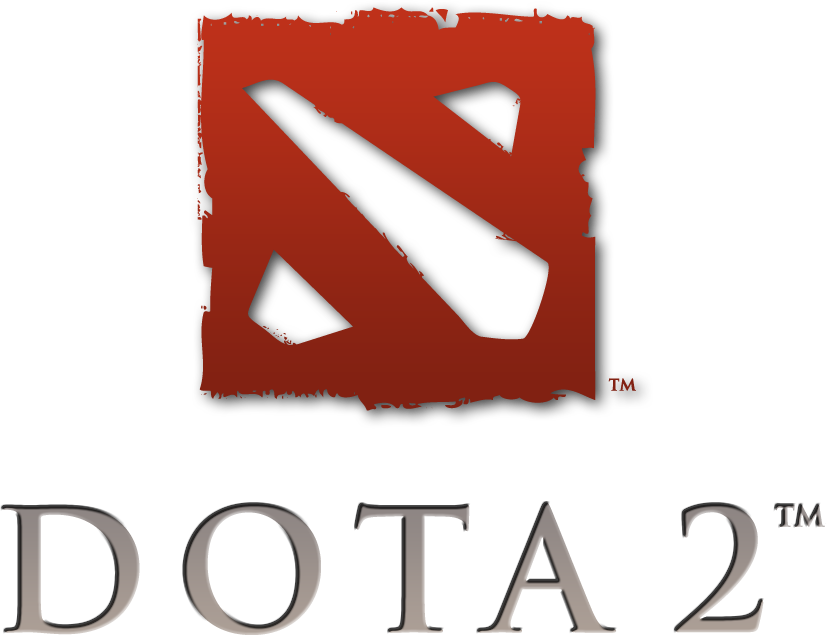
</div>


# <font color=black>DOTA 2 VERİ ÇALIŞMASI</font>


**Veri Seti :**[Kaggle Linki](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=players.csv)

_Defne Öztürk_
***
***

#### Gerekli kütüphaneler eklenir


In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#### Veriler değişkenlere atanır

In [3]:
games = pd.read_csv("players.csv")
hero_names = pd.read_csv("hero_names.csv")
match_results = pd.read_csv("match.csv")
item_names = pd.read_csv("item_ids.csv")
purchases = pd.read_csv("purchase_log.csv")
player_ratings = pd.read_csv("player_ratings.csv")

In [4]:
games.head()

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,...,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,...,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
games.shape

(500000, 73)

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 73 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   match_id                           500000 non-null  int64  
 1   account_id                         500000 non-null  int64  
 2   hero_id                            500000 non-null  int64  
 3   player_slot                        500000 non-null  int64  
 4   gold                               500000 non-null  int64  
 5   gold_spent                         500000 non-null  int64  
 6   gold_per_min                       500000 non-null  int64  
 7   xp_per_min                         500000 non-null  int64  
 8   kills                              500000 non-null  int64  
 9   deaths                             500000 non-null  int64  
 10  assists                            500000 non-null  int64  
 11  denies                             5000

#### Null değerlere 0 atanır

In [7]:
games = games.fillna(0)

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 73 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   match_id                           500000 non-null  int64  
 1   account_id                         500000 non-null  int64  
 2   hero_id                            500000 non-null  int64  
 3   player_slot                        500000 non-null  int64  
 4   gold                               500000 non-null  int64  
 5   gold_spent                         500000 non-null  int64  
 6   gold_per_min                       500000 non-null  int64  
 7   xp_per_min                         500000 non-null  int64  
 8   kills                              500000 non-null  int64  
 9   deaths                             500000 non-null  int64  
 10  assists                            500000 non-null  int64  
 11  denies                             5000

In [9]:
hero_names.head()

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden


In [10]:
hero_names.shape

(112, 3)

In [11]:
hero_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            112 non-null    object
 1   hero_id         112 non-null    int64 
 2   localized_name  112 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.8+ KB


In [12]:
match_results.head()

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156


In [13]:
match_results.shape

(50000, 13)

In [14]:
match_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   match_id                 50000 non-null  int64
 1   start_time               50000 non-null  int64
 2   duration                 50000 non-null  int64
 3   tower_status_radiant     50000 non-null  int64
 4   tower_status_dire        50000 non-null  int64
 5   barracks_status_dire     50000 non-null  int64
 6   barracks_status_radiant  50000 non-null  int64
 7   first_blood_time         50000 non-null  int64
 8   game_mode                50000 non-null  int64
 9   radiant_win              50000 non-null  bool 
 10  negative_votes           50000 non-null  int64
 11  positive_votes           50000 non-null  int64
 12  cluster                  50000 non-null  int64
dtypes: bool(1), int64(12)
memory usage: 4.6 MB


In [15]:
item_names.head()

,item_id,item_name
0,1,blink
1,2,blades_of_attack
2,3,broadsword
3,4,chainmail
4,5,claymore


In [16]:
item_names.shape

(189, 2)

In [17]:
item_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    189 non-null    int64 
 1   item_name  189 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [18]:
purchases.head()

,item_id,time,player_slot,match_id
0,44,-81,0,0
1,29,-63,0,0
2,43,6,0,0
3,84,182,0,0
4,46,197,0,0


In [19]:
purchases.shape

(18193745, 4)

In [20]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18193745 entries, 0 to 18193744
Data columns (total 4 columns):
 #   Column       Dtype
---  ------       -----
 0   item_id      int64
 1   time         int64
 2   player_slot  int64
 3   match_id     int64
dtypes: int64(4)
memory usage: 555.2 MB


In [21]:
player_ratings.head()

,account_id,total_wins,total_matches,trueskill_mu,trueskill_sigma
0,236579,14,24,27.868035,5.212361
1,-343,1,1,26.544163,8.065475
2,-1217,1,1,26.521103,8.114989
3,-1227,1,1,27.248025,8.092217
4,-1284,0,1,22.931016,8.092224


In [22]:
player_ratings.shape

(834226, 5)

In [23]:
player_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834226 entries, 0 to 834225
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   account_id       834226 non-null  int64  
 1   total_wins       834226 non-null  int64  
 2   total_matches    834226 non-null  int64  
 3   trueskill_mu     834226 non-null  float64
 4   trueskill_sigma  834226 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 31.8 MB


#### Tablolardan kullanılıcak kolonlar seçilir

In [24]:
games = games.iloc[:,:39]

In [25]:
hero_names = hero_names.iloc[:,-2:]

In [26]:
match_results = match_results.iloc[:,:10]

In [27]:
player_ratings = player_ratings.iloc[:,:3]

#### Kullanılacak tablolar birleştirilir

In [28]:
Dota = pd.merge(hero_names, games, how="left", left_on="hero_id", right_on="hero_id")
Dota.head(10)

,hero_id,localized_name,match_id,account_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,...,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers
0,1,Anti-Mage,12.0,0.0,130.0,1554.0,39915.0,688.0,487.0,17.0,...,308.0,-6410.0,-1888.0,0.0,2199.0,3566.0,9798.0,23596.0,1762.0,175.0
1,1,Anti-Mage,14.0,0.0,1.0,1941.0,11785.0,500.0,377.0,4.0,...,10.0,-1645.0,0.0,0.0,125.0,3631.0,1654.0,5898.0,200.0,150.0
2,1,Anti-Mage,21.0,123.0,4.0,7554.0,15325.0,665.0,583.0,12.0,...,198.0,-957.0,0.0,0.0,525.0,4664.0,4380.0,9296.0,502.0,0.0
3,1,Anti-Mage,23.0,135.0,3.0,9515.0,21925.0,678.0,712.0,9.0,...,358.0,-1225.0,0.0,0.0,1050.0,5333.0,4750.0,15628.0,0.0,350.0
4,1,Anti-Mage,25.0,0.0,132.0,979.0,12500.0,392.0,446.0,2.0,...,0.0,-3263.0,-202.0,0.0,1200.0,645.0,804.0,10391.0,0.0,0.0
5,1,Anti-Mage,28.0,0.0,1.0,6158.0,22935.0,795.0,755.0,16.0,...,219.0,-1046.0,0.0,0.0,350.0,5638.0,5597.0,13857.0,200.0,0.0
6,1,Anti-Mage,44.0,247.0,2.0,5537.0,36700.0,597.0,447.0,7.0,...,668.0,-3713.0,0.0,0.0,1199.0,4380.0,4304.0,26313.0,400.0,0.0
7,1,Anti-Mage,47.0,0.0,1.0,684.0,16550.0,565.0,510.0,5.0,...,194.0,-328.0,0.0,0.0,2075.0,4157.0,2465.0,4806.0,400.0,150.0
8,1,Anti-Mage,49.0,0.0,129.0,2749.0,19450.0,572.0,616.0,5.0,...,0.0,-2813.0,0.0,1336.0,800.0,1275.0,4932.0,11300.0,0.0,0.0
9,1,Anti-Mage,56.0,316.0,3.0,2892.0,24105.0,550.0,553.0,16.0,...,651.0,-5270.0,-3150.0,0.0,1362.0,2851.0,13503.0,9238.0,0.0,175.0


In [29]:
Dota.tail(10)

,hero_id,localized_name,match_id,account_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,...,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers
499955,112,Winter Wyvern,49930.0,158214.0,1.0,208.0,8270.0,216.0,227.0,2.0,...,50.0,-2989.0,0.0,0.0,0.0,1126.0,2652.0,1636.0,0.0,0.0
499956,112,Winter Wyvern,49939.0,60376.0,4.0,1182.0,6285.0,264.0,248.0,3.0,...,0.0,-2510.0,-730.0,0.0,0.0,1260.0,3741.0,544.0,0.0,0.0
499957,112,Winter Wyvern,49944.0,158258.0,4.0,3050.0,8275.0,272.0,326.0,1.0,...,421.0,-2482.0,0.0,0.0,25.0,3974.0,2314.0,981.0,200.0,0.0
499958,112,Winter Wyvern,49958.0,139136.0,131.0,2825.0,9885.0,279.0,292.0,2.0,...,357.0,-2180.0,0.0,0.0,262.0,3808.0,3045.0,1745.0,400.0,0.0
499959,112,Winter Wyvern,49967.0,60979.0,3.0,2558.0,16905.0,311.0,352.0,11.0,...,206.0,-2273.0,-1348.0,0.0,232.0,3356.0,7277.0,3359.0,0.0,350.0
499960,112,Winter Wyvern,49968.0,0.0,130.0,212.0,7175.0,188.0,222.0,1.0,...,50.0,-4575.0,0.0,0.0,75.0,880.0,1808.0,1868.0,200.0,0.0
499961,112,Winter Wyvern,49977.0,3901.0,2.0,1078.0,11840.0,324.0,375.0,6.0,...,322.0,-3589.0,0.0,0.0,75.0,3780.0,4357.0,855.0,200.0,0.0
499962,112,Winter Wyvern,49995.0,158352.0,132.0,2190.0,8635.0,254.0,275.0,1.0,...,198.0,-1944.0,-602.0,0.0,350.0,1320.0,3269.0,2991.0,0.0,0.0
499963,112,Winter Wyvern,49996.0,0.0,130.0,201.0,2335.0,142.0,121.0,0.0,...,150.0,-1789.0,0.0,0.0,0.0,320.0,249.0,320.0,0.0,0.0
499964,113,Arc Warden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
Dota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499965 entries, 0 to 499964
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hero_id                    499965 non-null  int64  
 1   localized_name             499965 non-null  object 
 2   match_id                   499963 non-null  float64
 3   account_id                 499963 non-null  float64
 4   player_slot                499963 non-null  float64
 5   gold                       499963 non-null  float64
 6   gold_spent                 499963 non-null  float64
 7   gold_per_min               499963 non-null  float64
 8   xp_per_min                 499963 non-null  float64
 9   kills                      499963 non-null  float64
 10  deaths                     499963 non-null  float64
 11  assists                    499963 non-null  float64
 12  denies                     499963 non-null  float64
 13  last_hits                  49

#### Maç bilgisi bulunmayan hero bilgilerinin (null) silinmesi (Arc warden, underlord)

In [31]:
Dota = Dota[Dota['match_id'].notna()]
Dota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499963 entries, 0 to 499963
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hero_id                    499963 non-null  int64  
 1   localized_name             499963 non-null  object 
 2   match_id                   499963 non-null  float64
 3   account_id                 499963 non-null  float64
 4   player_slot                499963 non-null  float64
 5   gold                       499963 non-null  float64
 6   gold_spent                 499963 non-null  float64
 7   gold_per_min               499963 non-null  float64
 8   xp_per_min                 499963 non-null  float64
 9   kills                      499963 non-null  float64
 10  deaths                     499963 non-null  float64
 11  assists                    499963 non-null  float64
 12  denies                     499963 non-null  float64
 13  last_hits                  49

In [32]:
Dota = pd.merge(match_results, Dota, how="left", left_on="match_id", right_on="match_id")
Dota.head(10)

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,...,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers
0,0,1446750112,2375,1982,4,3,63,1,22,True,...,0.0,-3286.0,-39.0,0.0,0.0,320.0,2127.0,1089.0,0.0,0.0
1,0,1446750112,2375,1982,4,3,63,1,22,True,...,100.0,-2156.0,0.0,0.0,938.0,4714.0,4104.0,10432.0,400.0,0.0
2,0,1446750112,2375,1982,4,3,63,1,22,True,...,107.0,-3682.0,0.0,0.0,242.0,695.0,4350.0,8797.0,0.0,0.0
3,0,1446750112,2375,1982,4,3,63,1,22,True,...,395.0,-1137.0,0.0,0.0,1650.0,3299.0,6676.0,4317.0,937.0,0.0
4,0,1446750112,2375,1982,4,3,63,1,22,True,...,0.0,-1437.0,-1056.0,0.0,4194.0,3217.0,7467.0,9220.0,400.0,0.0
5,0,1446750112,2375,1982,4,3,63,1,22,True,...,5679.0,-4039.0,-1063.0,0.0,637.0,320.0,2685.0,7011.0,0.0,0.0
6,0,1446750112,2375,1982,4,3,63,1,22,True,...,259.0,-1436.0,-1015.0,0.0,0.0,3142.0,2418.0,3697.0,400.0,0.0
7,0,1446750112,2375,1982,4,3,63,1,22,True,...,50.0,-957.0,0.0,0.0,212.0,3120.0,5145.0,1087.0,400.0,0.0
8,0,1446750112,2375,1982,4,3,63,1,22,True,...,0.0,-3287.0,0.0,0.0,262.0,320.0,3396.0,4356.0,0.0,0.0
9,0,1446750112,2375,1982,4,3,63,1,22,True,...,0.0,-2394.0,-2240.0,0.0,200.0,320.0,5281.0,6193.0,0.0,0.0


In [33]:
Dota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499963 entries, 0 to 499962
Data columns (total 49 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   match_id                   499963 non-null  int64  
 1   start_time                 499963 non-null  int64  
 2   duration                   499963 non-null  int64  
 3   tower_status_radiant       499963 non-null  int64  
 4   tower_status_dire          499963 non-null  int64  
 5   barracks_status_dire       499963 non-null  int64  
 6   barracks_status_radiant    499963 non-null  int64  
 7   first_blood_time           499963 non-null  int64  
 8   game_mode                  499963 non-null  int64  
 9   radiant_win                499963 non-null  bool   
 10  hero_id                    499963 non-null  int64  
 11  localized_name             499963 non-null  object 
 12  account_id                 499963 non-null  float64
 13  player_slot                49

In [34]:
purchases = pd.merge(item_names, purchases, how="left", left_on="item_id", right_on="item_id")
purchases.head(10)

,item_id,item_name,time,player_slot,match_id
0,1,blink,972.0,0.0,1.0
1,1,blink,1131.0,1.0,1.0
2,1,blink,1090.0,128.0,1.0
3,1,blink,1858.0,129.0,1.0
4,1,blink,2029.0,132.0,1.0
5,1,blink,2321.0,128.0,2.0
6,1,blink,1368.0,129.0,2.0
7,1,blink,1044.0,3.0,3.0
8,1,blink,916.0,128.0,3.0
9,1,blink,1238.0,0.0,4.0


In [35]:
Dota.describe()

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,hero_id,...,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers
count,499963.000000,4.999630e+05,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,...,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000
mean,24999.487052,1.447573e+09,2476.505537,1000.015513,935.231633,34.529223,34.775061,93.825529,21.467961,50.555197,...,399.994630,-2654.886004,-337.238054,46.044769,523.608371,2352.562644,4936.339893,5101.351496,195.686843,38.215848
std,14433.737484,1.485254e+05,634.590836,948.202663,937.963358,29.209408,29.731956,92.649055,3.218345,32.807455,...,1251.868403,1514.377458,665.372514,344.138879,944.612998,1738.373273,2683.965056,3930.721501,255.287354,85.536828
min,0.000000,1.446750e+09,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,...,-100.000000,-23757.000000,-22602.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12500.000000,1.447456e+09,2029.000000,0.000000,0.000000,0.000000,0.000000,9.000000,22.000000,21.000000,...,61.000000,-3562.000000,-407.000000,0.000000,37.000000,580.000000,3019.000000,2103.000000,0.000000,0.000000
50%,24999.000000,1.447577e+09,2415.000000,1536.000000,384.000000,51.000000,51.000000,77.000000,22.000000,47.000000,...,166.000000,-2508.000000,0.000000,0.000000,235.000000,2460.000000,4537.000000,4174.000000,200.000000,0.000000
75%,37499.500000,1.447700e+09,2872.000000,1974.000000,1972.000000,63.000000,63.000000,144.000000,22.000000,75.000000,...,336.000000,-1550.000000,0.000000,0.000000,645.000000,3962.000000,6411.000000,7074.000000,383.000000,0.000000
max,49999.000000,1.447829e+09,16037.000000,2047.000000,2047.000000,63.000000,63.000000,831.000000,22.000000,112.000000,...,30986.000000,0.000000,0.000000,18339.000000,197237.000000,7610.000000,37658.000000,112058.000000,4227.000000,1725.000000


In [36]:
Dota.iloc[:,:27].iloc[:,14:].describe()

,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,denies,last_hits,hero_damage,hero_healing,tower_damage
count,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,499963.00000,499963.000000,499963.000000,499963.000000
mean,1888.656399,14111.088071,415.118485,450.005530,7.405048,7.681320,11.762770,5.136270,129.49262,12235.683209,466.659459,1313.307419
std,1742.938033,6400.954875,138.192643,146.354295,5.437630,3.807659,6.392811,5.898766,100.06011,6719.587039,1210.390898,1801.220324
min,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,586.000000,9590.000000,317.000000,343.000000,3.000000,5.000000,7.000000,1.000000,54.00000,7309.000000,0.000000,118.000000
50%,1350.000000,13110.000000,395.000000,443.000000,6.000000,8.000000,11.000000,3.000000,105.00000,10947.000000,0.000000,554.000000
75%,2742.000000,17635.000000,496.000000,550.000000,10.000000,10.000000,16.000000,7.000000,178.00000,15874.000000,214.000000,1750.000000
max,46424.000000,200000.000000,1601.000000,1559.000000,59.000000,42.000000,54.000000,112.000000,2000.00000,74932.000000,19222.000000,15986.000000


In [37]:
Dota.iloc[:,33:].describe()

,level,leaver_status,xp_hero,xp_creep,xp_roshan,xp_other,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers
count,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,499963.00000,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000,499963.000000
mean,18.053526,0.038643,8732.410270,9471.570736,261.274138,429.75163,399.994630,-2654.886004,-337.238054,46.044769,523.608371,2352.562644,4936.339893,5101.351496,195.686843,38.215848
std,4.356836,0.283508,4879.040598,4422.375077,476.442205,1111.51625,1251.868403,1514.377458,665.372514,344.138879,944.612998,1738.373273,2683.965056,3930.721501,255.287354,85.536828
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-100.000000,-23757.000000,-22602.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,4995.000000,6128.000000,0.000000,112.00000,61.000000,-3562.000000,-407.000000,0.000000,37.000000,580.000000,3019.000000,2103.000000,0.000000,0.000000
50%,18.000000,0.000000,8098.000000,8653.000000,0.000000,280.00000,166.000000,-2508.000000,0.000000,0.000000,235.000000,2460.000000,4537.000000,4174.000000,200.000000,0.000000
75%,21.000000,0.000000,11922.000000,12077.000000,447.000000,533.00000,336.000000,-1550.000000,0.000000,0.000000,645.000000,3962.000000,6411.000000,7074.000000,383.000000,0.000000
max,25.000000,4.000000,29055.000000,31642.000000,8050.000000,25557.00000,30986.000000,0.000000,0.000000,18339.000000,197237.000000,7610.000000,37658.000000,112058.000000,4227.000000,1725.000000


#### Veri setindeki maç sayısı

In [38]:
Dota.match_id.nunique()

50000

#### Veri setindeki hesap(account) sayısı

In [39]:
Dota.account_id.nunique()

158356

#### Veri setindeki kahraman sayısı

In [40]:
Dota.hero_id.nunique()

110

#### Veri setinde en çok oynanan kahramanlar

In [41]:
Dota.localized_name.value_counts().head(10)

Windranger       20881
Shadow Fiend     17007
Invoker          11676
Earthshaker      11323
Slardar          11181
Queen of Pain    10590
Juggernaut       10394
Tusk             10306
Alchemist         9823
Pudge             9447
Name: localized_name, dtype: int64

#### Veri setinde en az oynanan kahramanlar

In [42]:
Dota.localized_name.value_counts().tail(10)

Batrider       1054
Enchantress    1016
Oracle         1009
Naga Siren     1001
Visage          997
Lycan           985
Lone Druid      967
Brewmaster      931
Elder Titan     838
Chen            579
Name: localized_name, dtype: int64

Text(0, 0.5, 'Frequency')

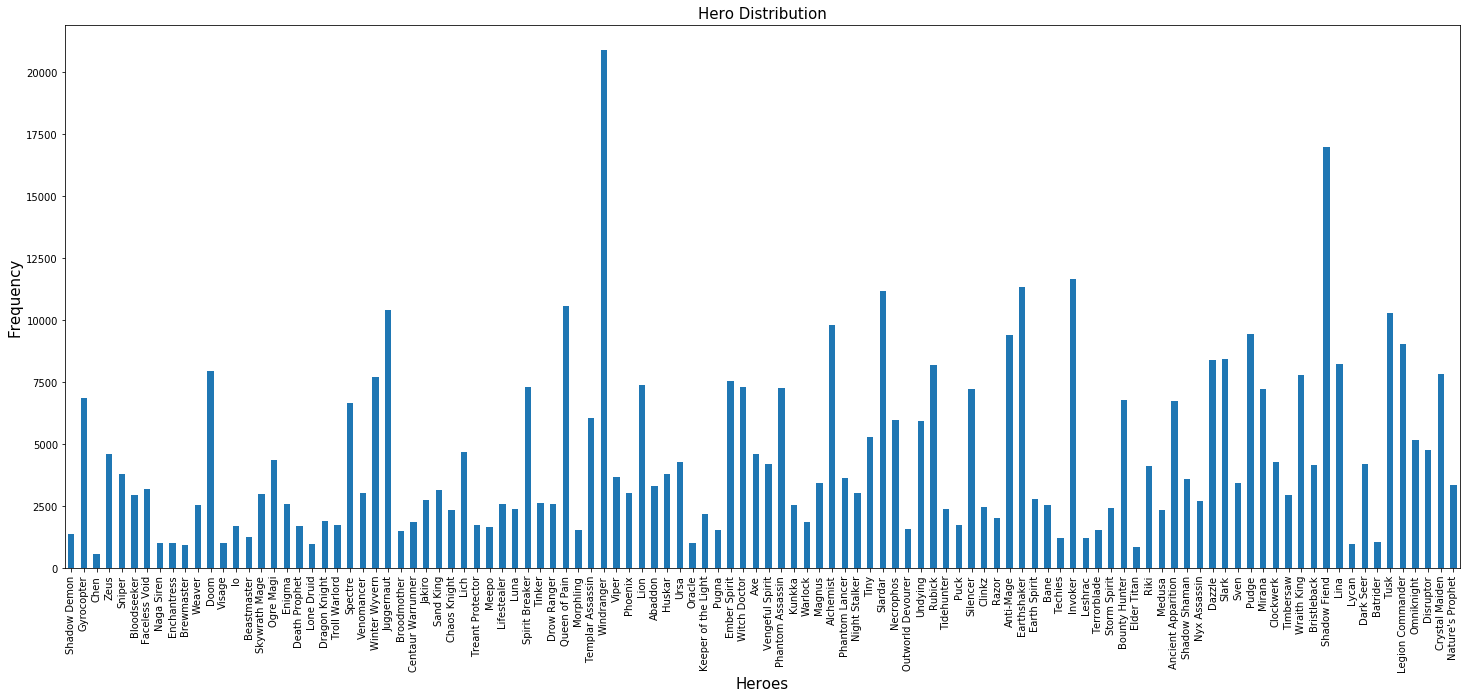

In [43]:
fig,ax = plt.subplots(figsize=(25,10))
Dota['localized_name'].value_counts(sort=False).plot(kind='bar',ax=ax,rot =90)
plt.title('Hero Distribution',fontsize=15)
plt.xlabel('Heroes',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

#### En çok toplam öldürmeye sahip hesap(account)
acount_id = 0 account_id vermek istemeyen hesaplar için kullanılmıştır.

In [44]:
Dota.groupby(by = "account_id").sum().sort_values(by = "kills", ascending = False).kills.to_frame()

,kills
account_id,
0.0,1347261.0
2962.0,595.0
732.0,545.0
4709.0,517.0
22106.0,517.0
...,...
133626.0,0.0
100077.0,0.0
120709.0,0.0


#### Ortalama en çok öldürmeye sahip hesap(account)

In [45]:
Dota.groupby(by = "account_id").mean().sort_values(by = "kills", ascending = False).kills.to_frame()

,kills
account_id,
145802.0,59.0
106851.0,50.0
44725.0,48.0
128032.0,46.0
18473.0,46.0
...,...
87549.0,0.0
140167.0,0.0
140182.0,0.0


#### Ortalama en çok öldürmeye sahip hero

In [46]:
Dota.groupby(by = "localized_name").mean().sort_values(by = "kills", ascending = False)

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,...,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers
localized_name,,,,,,,,,,,,,,,,,,,,,
Riki,24482.033092,1.447567e+09,2505.737198,1015.647826,925.924879,34.941063,35.846135,102.278502,21.792271,0.526329,...,256.561836,-2678.187681,-346.750242,58.541304,616.832367,2495.581401,7142.634783,3802.800725,196.640338,32.041063
Ursa,24651.429800,1.447569e+09,2425.123431,971.672013,964.513017,35.374942,34.011623,96.561599,21.660623,0.504881,...,223.717341,-2761.736867,-425.349140,44.961181,548.049977,2601.829614,5990.769177,5267.104835,887.241283,37.255927
Queen of Pain,25321.552502,1.447576e+09,2497.033050,1011.847403,923.798772,34.222474,34.904249,90.268272,21.310670,0.524646,...,444.388763,-2666.166761,-385.298678,39.464873,736.863456,2205.300472,5870.112748,6309.448631,182.393673,34.220491
Templar Assassin,25487.378186,1.447578e+09,2370.016882,1019.288150,926.094340,34.395233,35.376531,102.361304,21.513406,0.526812,...,419.005131,-2656.374379,-457.680569,45.795432,850.183217,2645.615856,5584.462761,7680.086726,371.374048,31.790798
Huskar,26945.018509,1.447592e+09,2398.309889,965.614490,976.560550,36.000529,34.271549,92.712322,21.460603,0.496298,...,165.078530,-3420.932311,-373.056584,50.346378,500.440243,2442.130619,5727.444738,4725.174246,257.989688,37.082232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Io,24649.983471,1.447569e+09,2308.827037,1019.923259,935.250295,35.341204,35.439787,86.438017,21.220779,0.526564,...,220.533058,-2463.187131,-272.629280,31.135183,278.570838,1944.681228,3639.295750,1079.623967,159.988194,38.007674
Omniknight,25103.810308,1.447574e+09,2411.735516,1004.563457,941.506491,34.520054,35.306530,105.451850,21.391591,0.517342,...,130.064716,-1988.224181,-153.613447,50.582445,274.973067,2390.957179,3695.238907,2004.756249,163.149196,39.704515
Keeper of the Light,24063.038302,1.447563e+09,2525.346101,950.101061,972.957084,35.477157,32.998154,90.760960,21.787725,0.497000,...,163.099216,-2245.414398,-218.100138,60.604984,268.151361,2111.276419,3456.411629,3473.271804,149.889709,43.368713


#### Ortalama en çok hasar veren hero

In [47]:
Dota.groupby(by = "localized_name").mean().sort_values(by = "hero_damage", ascending = False)

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,...,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers
localized_name,,,,,,,,,,,,,,,,,,,,,
Zeus,24497.217912,1.447568e+09,2580.488342,1008.669645,917.606232,34.166921,35.078448,96.250599,21.542384,0.525605,...,345.544127,-2683.375681,-342.672478,46.946611,457.817825,2310.194596,6014.217477,4238.592940,158.658967,40.326869
Tinker,24443.425670,1.447567e+09,2616.057088,991.374330,957.017625,34.675096,34.496935,90.643295,21.747126,0.509195,...,171.613793,-2929.552874,-524.010345,59.852874,293.777011,1937.692720,5626.362452,7727.580077,133.237548,40.101533
Spectre,24812.206607,1.447571e+09,2538.711862,1013.907958,921.776577,34.233934,35.000601,96.001351,21.582583,0.527477,...,145.881231,-2402.320270,-435.308258,44.945345,644.515766,2556.867568,5923.536787,8226.937387,168.464414,37.327327
Gyrocopter,25462.236727,1.447578e+09,2529.441074,980.373104,946.780484,34.888127,34.314323,90.779901,21.066511,0.510356,...,208.162048,-2816.290694,-407.683343,40.286173,738.548133,2566.226371,5163.311260,8734.192386,219.751021,36.481914
Shadow Fiend,25050.110308,1.447574e+09,2434.263421,996.095666,942.737696,34.506380,34.437702,93.667137,21.543717,0.516493,...,382.047333,-2881.394191,-431.210796,45.046451,1065.254307,2776.299524,5258.232728,9571.285823,255.814253,33.070206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Io,24649.983471,1.447569e+09,2308.827037,1019.923259,935.250295,35.341204,35.439787,86.438017,21.220779,0.526564,...,220.533058,-2463.187131,-272.629280,31.135183,278.570838,1944.681228,3639.295750,1079.623967,159.988194,38.007674
Chen,25791.727116,1.447582e+09,2406.373057,986.656304,948.981002,35.594128,34.056995,104.908463,21.792746,0.514680,...,138.820380,-2073.376511,-145.431779,26.955095,227.974093,2241.799655,3120.970639,3051.813472,174.625216,36.908463
Omniknight,25103.810308,1.447574e+09,2411.735516,1004.563457,941.506491,34.520054,35.306530,105.451850,21.391591,0.517342,...,130.064716,-1988.224181,-153.613447,50.582445,274.973067,2390.957179,3695.238907,2004.756249,163.149196,39.704515


#### Ortalama en çok son vuruşa sahip hero

In [48]:
Dota.groupby(by = "localized_name").mean().sort_values(by = "last_hits", ascending = False)

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,...,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers
localized_name,,,,,,,,,,,,,,,,,,,,,
Anti-Mage,25174.778523,1.447575e+09,2428.659430,1000.316305,925.138570,33.580673,34.276713,101.257663,21.693487,0.521392,...,215.145594,-2222.283099,-384.869625,47.083546,642.357173,2637.048425,4229.203597,11546.072584,186.587058,37.405811
Alchemist,25367.509417,1.447577e+09,2436.046727,992.696020,935.746717,33.956632,34.205640,92.538023,21.749567,0.517866,...,7951.188028,-2808.196987,-577.051919,51.761682,833.557976,2613.759748,3965.879772,10292.677492,166.661509,34.195765
Medusa,24601.650000,1.447570e+09,2571.579661,993.897458,932.395763,34.128390,34.416949,96.909746,21.372881,0.518220,...,203.275000,-2101.389407,-320.507203,40.856356,627.953814,2634.196186,4145.446610,10188.130932,168.092373,39.542373
Shadow Fiend,25050.110308,1.447574e+09,2434.263421,996.095666,942.737696,34.506380,34.437702,93.667137,21.543717,0.516493,...,382.047333,-2881.394191,-431.210796,45.046451,1065.254307,2776.299524,5258.232728,9571.285823,255.814253,33.070206
Luna,25246.649706,1.447576e+09,2455.324222,1021.579899,905.775442,34.177040,35.840202,94.231287,21.411270,0.534062,...,174.258200,-2770.528175,-358.230025,43.211522,660.051724,2967.167368,4786.394449,9120.392347,206.241800,39.831791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Skywrath Mage,25041.077957,1.447573e+09,2477.218078,985.305108,958.315524,35.263105,34.329973,91.999664,21.543011,0.512097,...,197.881720,-2662.056788,-264.049059,50.528226,347.391801,1956.938508,5058.963710,1502.428763,154.264785,37.864583
Disruptor,24787.915158,1.447571e+09,2471.382737,985.244000,945.379158,34.983368,34.180000,88.797684,21.065263,0.514737,...,168.249263,-2467.338947,-189.162105,46.946316,240.482105,2191.615368,4299.657474,1438.620421,164.028632,40.526316
Lion,24702.015037,1.447570e+09,2504.416689,1009.722027,925.012598,34.290030,35.107153,92.634516,21.322677,0.524248,...,174.273503,-2650.554728,-262.043213,45.305879,272.012598,2027.542265,4403.495530,1372.776348,159.456109,41.621512


#### Ortalama en çok dakika başına para kazanan hero

In [49]:
Dota.groupby(by = "localized_name").mean().sort_values(by = "gold_per_min", ascending = False)

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,...,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers
localized_name,,,,,,,,,,,,,,,,,,,,,
Alchemist,25367.509417,1.447577e+09,2436.046727,992.696020,935.746717,33.956632,34.205640,92.538023,21.749567,0.517866,...,7951.188028,-2808.196987,-577.051919,51.761682,833.557976,2613.759748,3965.879772,10292.677492,166.661509,34.195765
Anti-Mage,25174.778523,1.447575e+09,2428.659430,1000.316305,925.138570,33.580673,34.276713,101.257663,21.693487,0.521392,...,215.145594,-2222.283099,-384.869625,47.083546,642.357173,2637.048425,4229.203597,11546.072584,186.587058,37.405811
Shadow Fiend,25050.110308,1.447574e+09,2434.263421,996.095666,942.737696,34.506380,34.437702,93.667137,21.543717,0.516493,...,382.047333,-2881.394191,-431.210796,45.046451,1065.254307,2776.299524,5258.232728,9571.285823,255.814253,33.070206
Templar Assassin,25487.378186,1.447578e+09,2370.016882,1019.288150,926.094340,34.395233,35.376531,102.361304,21.513406,0.526812,...,419.005131,-2656.374379,-457.680569,45.795432,850.183217,2645.615856,5584.462761,7680.086726,371.374048,31.790798
Meepo,24413.823952,1.447567e+09,2369.988024,966.201796,958.840120,34.847904,34.288623,102.107784,21.664671,0.497605,...,191.770659,-3610.622754,-723.254491,56.491617,540.966467,2575.946707,5197.710778,8243.145509,284.844910,33.739521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lion,24702.015037,1.447570e+09,2504.416689,1009.722027,925.012598,34.290030,35.107153,92.634516,21.322677,0.524248,...,174.273503,-2650.554728,-262.043213,45.305879,272.012598,2027.542265,4403.495530,1372.776348,159.456109,41.621512
Bane,26172.166079,1.447585e+09,2484.794360,998.403447,935.880924,34.847630,35.143361,95.363494,20.926753,0.516647,...,188.609087,-2387.558950,-227.649040,34.850764,290.524873,2107.645515,4291.962397,1217.792793,171.187622,42.267920
Shadow Demon,24694.931183,1.447571e+09,2481.109677,969.197849,959.385663,35.205018,33.855914,85.049462,21.455197,0.502509,...,177.667384,-2638.780645,-215.801434,41.939785,254.582796,1853.930466,3861.003584,1904.924731,149.517563,39.189964


#### Radiant kazanılan maç sayısı

In [50]:
len(match_results.loc[match_results.radiant_win == True])

25943

#### Dire kazanılan maç sayısı

In [51]:
len(match_results.loc[match_results.radiant_win == False])

24057

In [52]:
print('The number of wins are equal to each team? {}'.format(
    round(len(match_results.loc[match_results.radiant_win == True])/len(match_results.loc[match_results.radiant_win == False]), 1) == 1
))
print('How much is this advantage ratio? {}%'.format(
    round(len(match_results.loc[match_results.radiant_win == True])/len(match_results.loc[match_results.radiant_win == False]) - 1, 3) * 100
))

The number of wins are equal to each team? False
How much is this advantage ratio? 7.8%


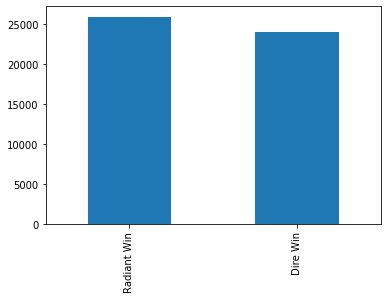

In [53]:
y = match_results['radiant_win'].apply(lambda win: True if win else False)
classes = ['Dire Win', 'Radiant Win']
_ = pd.Series(y).apply(lambda i: classes[i]).value_counts().plot(kind = 'bar')

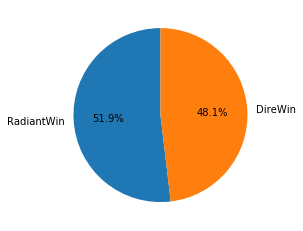

In [54]:
X = [match_results.radiant_win[(match_results['radiant_win']==True)].count(),match_results.radiant_win[(match_results['radiant_win']==False)].count()]
Y = ["RadiantWin","DireWin"]
plt.pie(X, labels=Y, startangle=90, autopct='%.1f%%')
plt.show()
plt.ioff()

#### Veri setinde en çok satın alınan itemlar

In [55]:
purchases.item_name.value_counts().to_frame().head(10)

,item_name
tpscroll,3864464
ward_observer,1214710
branches,745330
boots,551272
tango,490735
ward_sentry,466971
ward_dispenser,453635
circlet,412626
clarity,369774
ogre_axe,300991


#### Veri setinde en az satın alınan itemlar

In [56]:
purchases.item_name.value_counts().to_frame().tail(10)

,item_name
aegis,1
halloween_rapier,1
mystery_vacuum,1
winter_coco,1
aether_lens,1
river_painter7,1
greevil_whistle,1
echo_sabre,1
river_painter3,1
tome_of_knowledge,1


Text(0, 0.5, 'Frequency')

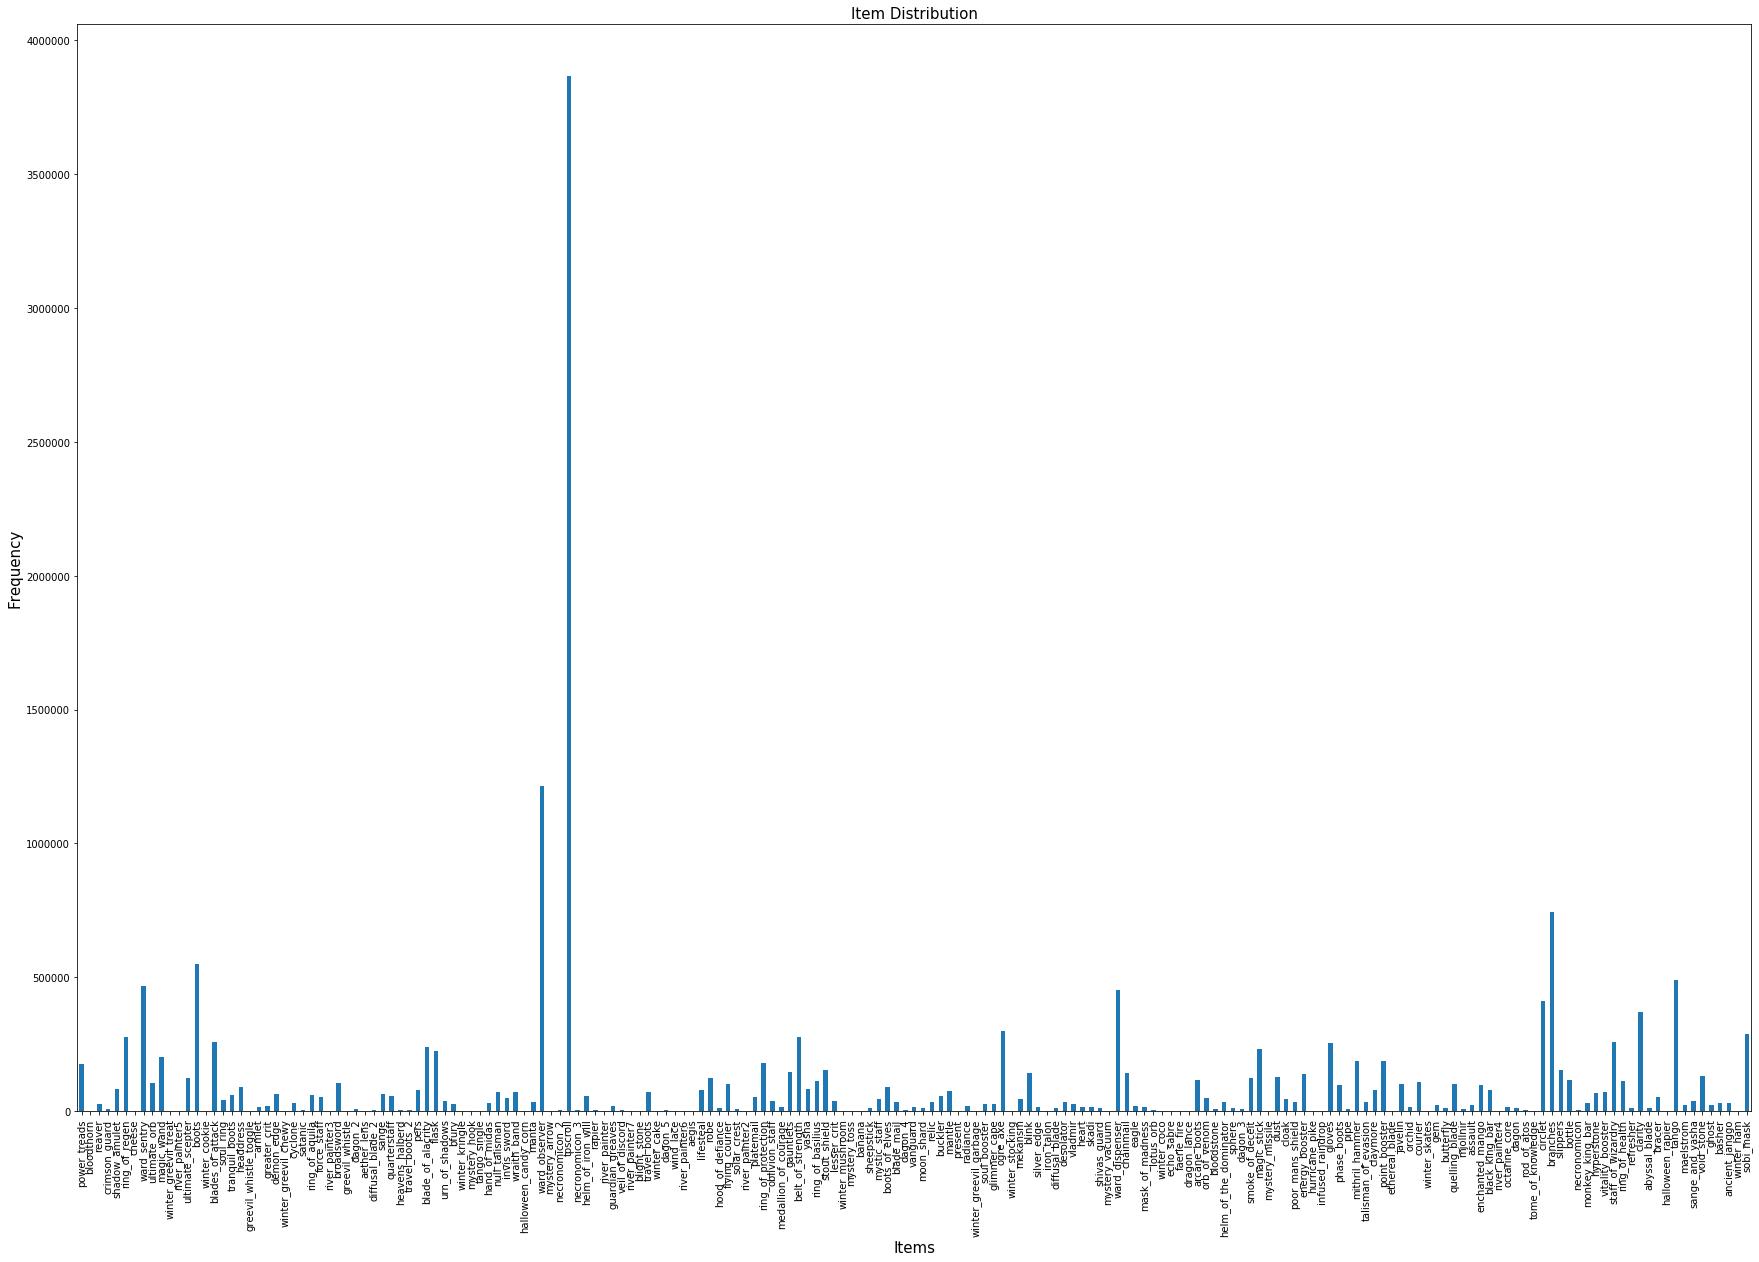

In [57]:
fig,ax = plt.subplots(figsize=(30,20))
purchases['item_name'].value_counts(sort=False).plot(kind='bar',ax=ax,rot =90)
plt.title('Item Distribution',fontsize=15)
plt.xlabel('Items',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

#### Veri setinde en fazla oyun kazanmış kullanıcılar

In [58]:
player_ratings.groupby(by = "account_id").mean().sort_values(by = "total_wins", ascending = False)

,total_wins,total_matches
account_id,,
0,1608398,3315071
6647,396,785
12357,341,623
77866,302,570
35770,290,561
...,...,...
-105450645,0,1
-105452873,0,1
-105453392,0,1


#### Korelasyon Matrisleri

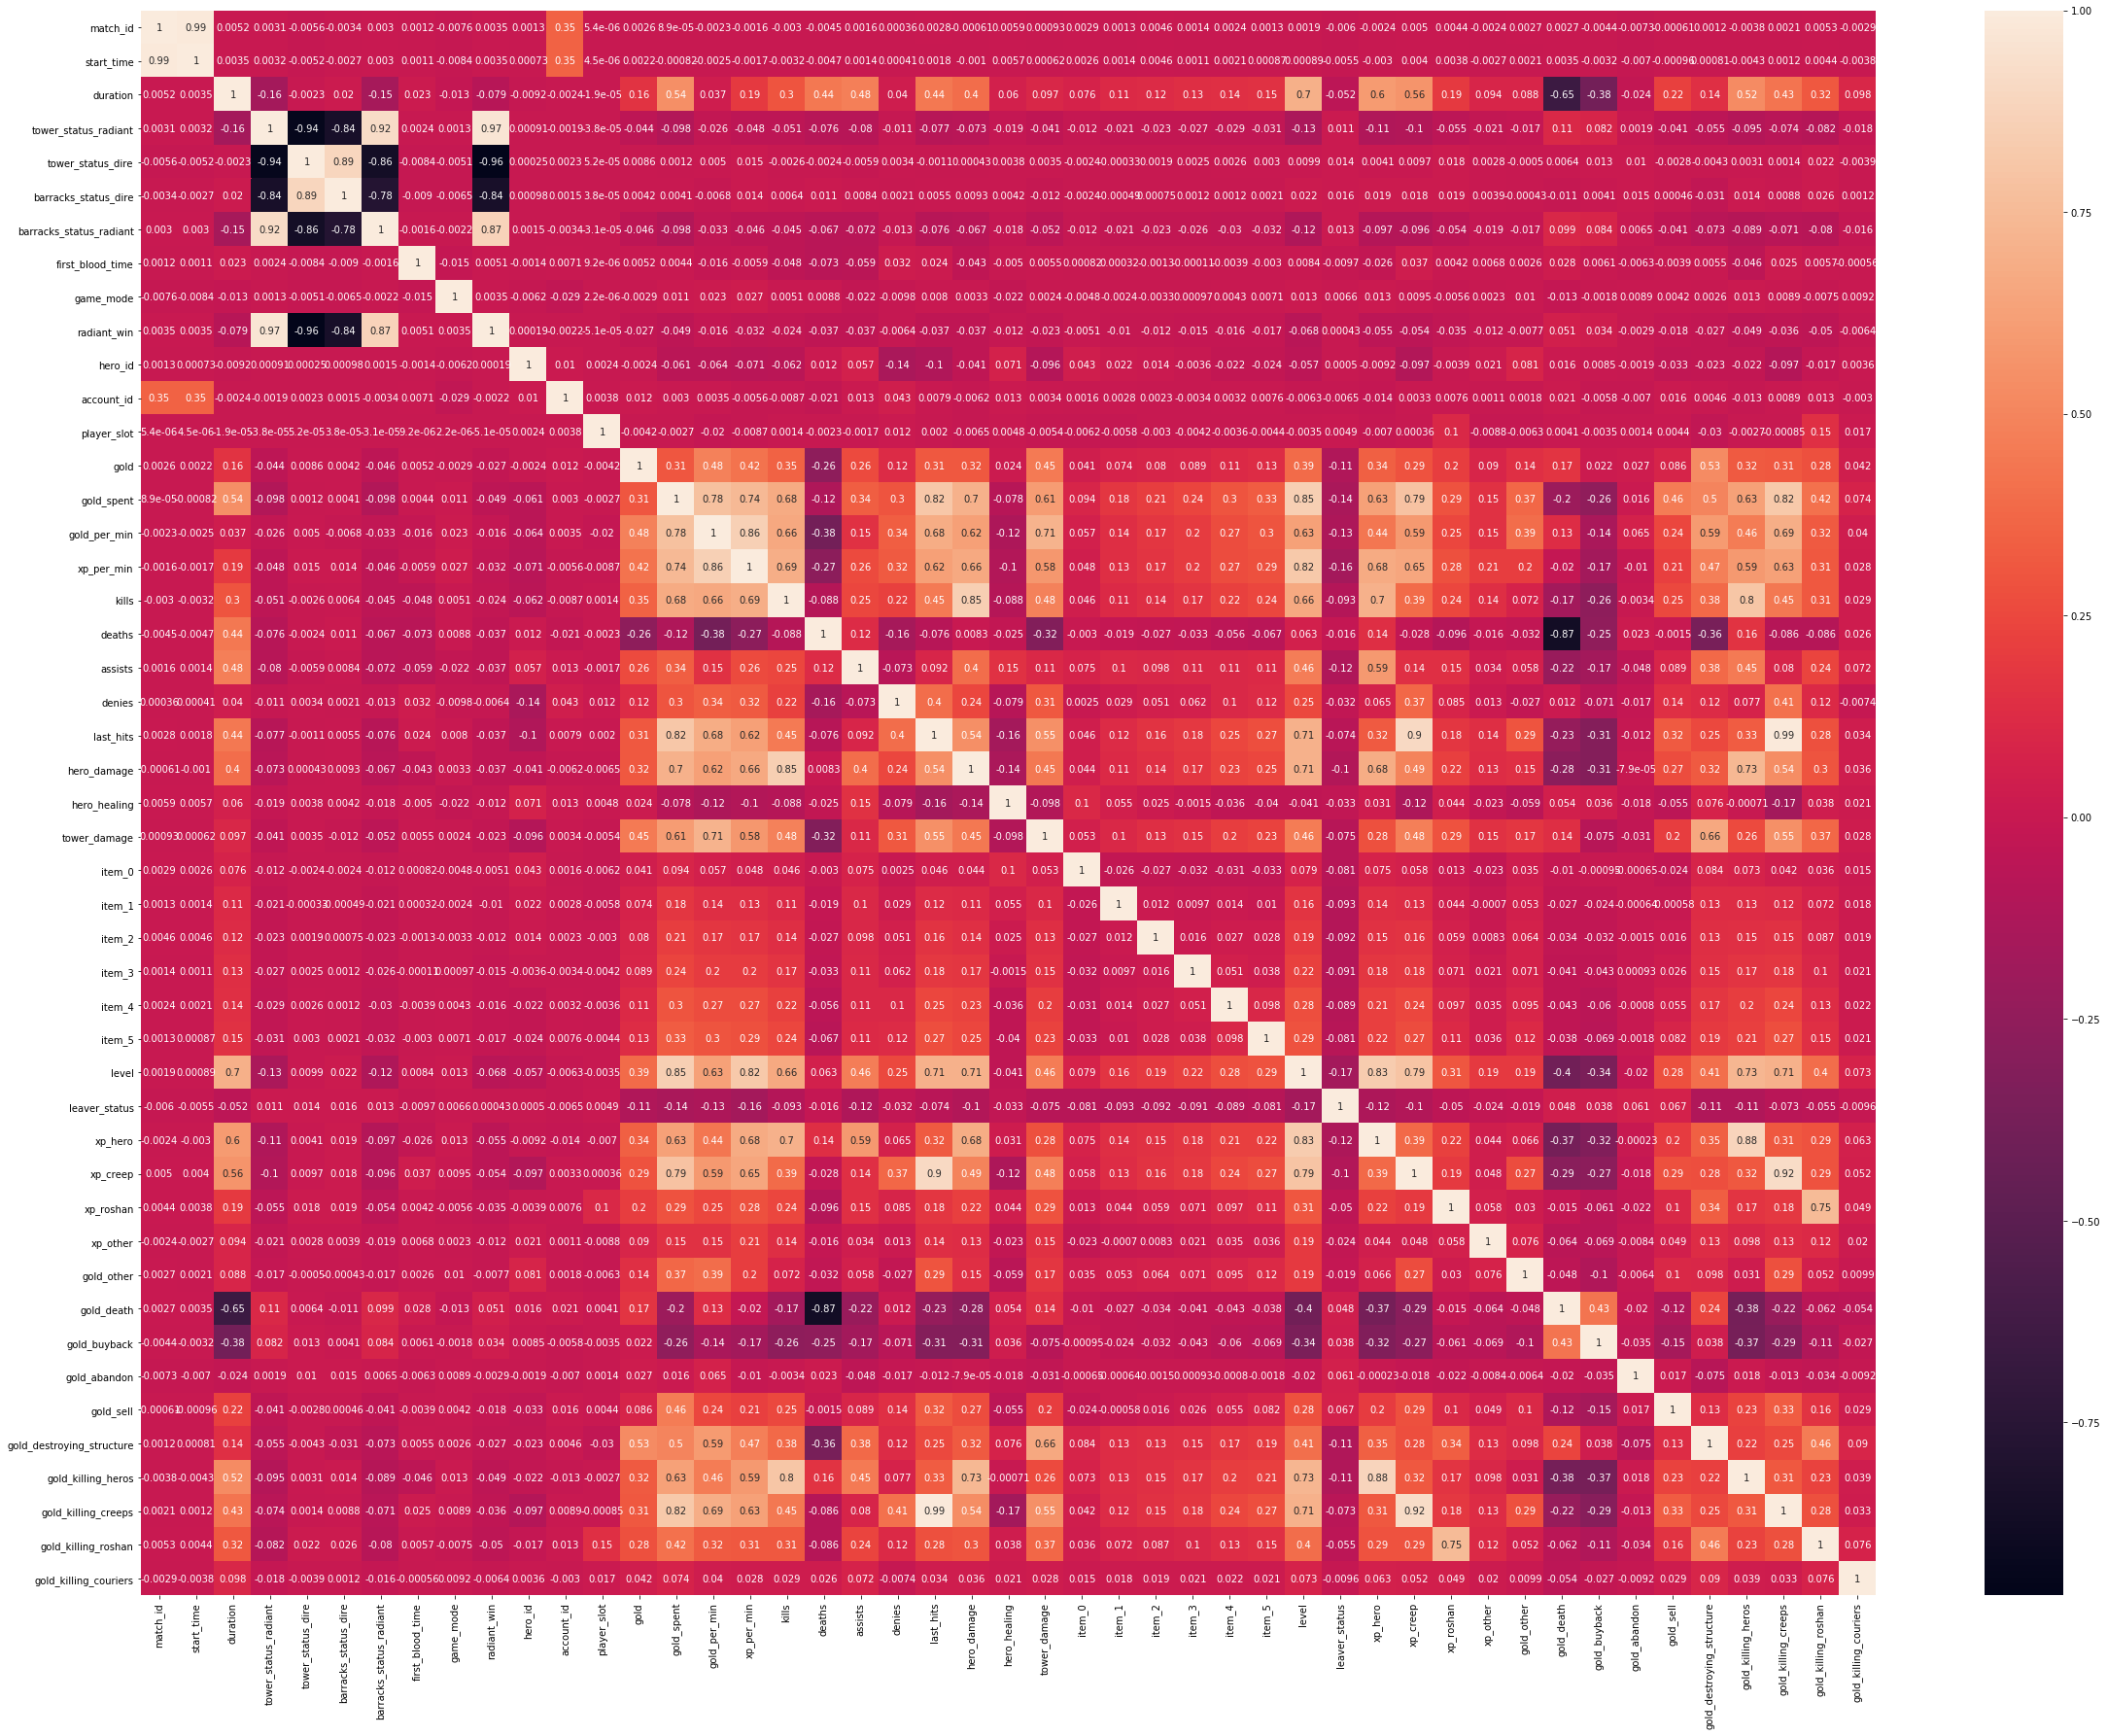

In [59]:
corrMatrix = Dota.corr()
f, ax = plt.subplots(figsize=(40, 30))
sns.heatmap(corrMatrix, annot=True)
plt.show()

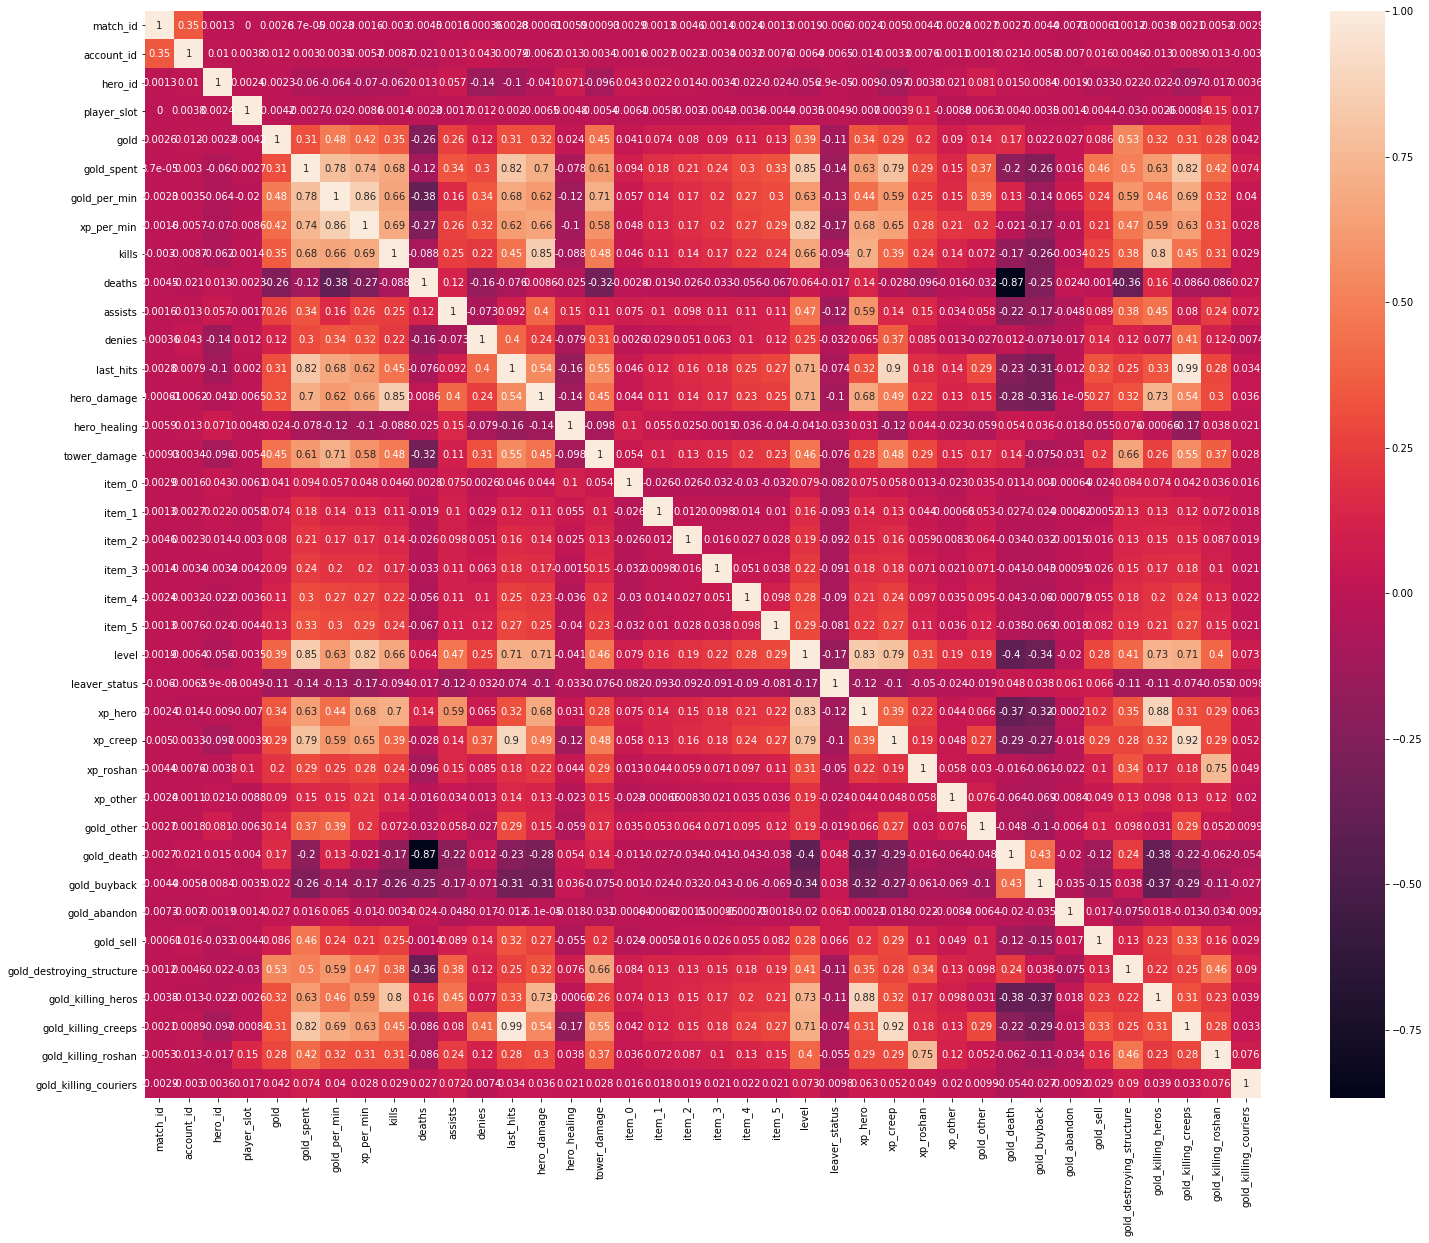

In [60]:
corrMatrix = games.corr()
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

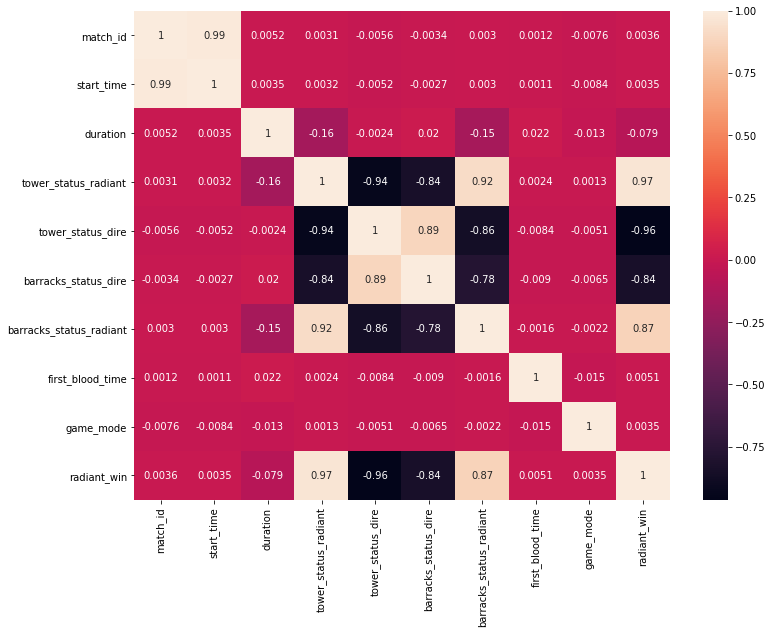

In [61]:
corrMatrix = match_results.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrMatrix, annot=True)
plt.show()

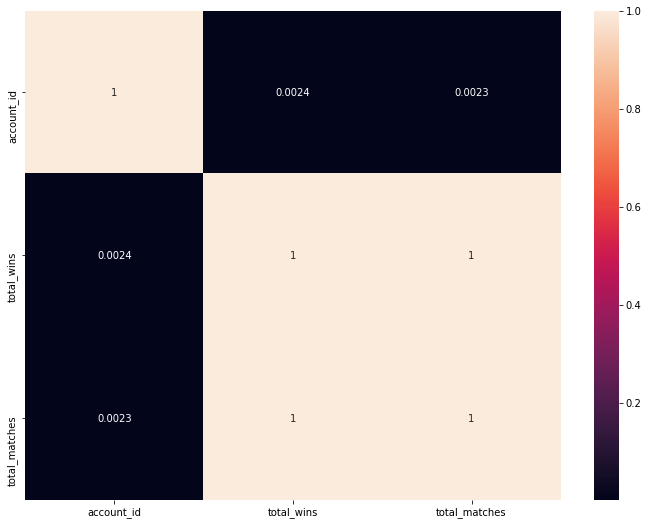

In [62]:
corrMatrix = player_ratings.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrMatrix, annot=True)
plt.show()